# 데이터 수집

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc, cm
import matplotlib as mpl

# 마이너스 깨짐 현상 해결
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
path = '../datasets/ML_data/'

raw = pd.read_csv(path+'housing_data.csv', header=None, sep=',')

col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV', 'isHighValue']
raw.columns = col_names

df = raw.copy()
print(df.shape)
df.head(2)

(526, 15)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           526 non-null    float64
 2   INDUS        526 non-null    float64
 3   CHAS         526 non-null    int64  
 4   NOX          526 non-null    float64
 5   RM           526 non-null    float64
 6   AGE          526 non-null    float64
 7   DIS          526 non-null    float64
 8   RAD          526 non-null    int64  
 9   TAX          526 non-null    float64
 10  PTRATIO      526 non-null    float64
 11  B            526 non-null    float64
 12  LSTAT        526 non-null    float64
 13  MEDV         526 non-null    float64
 14  isHighValue  526 non-null    int64  
dtypes: float64(12), int64(3)
memory usage: 61.8 KB


CRIM에 결측치 확인함.

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue
count,506.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,3.613524,10.931559,11.306616,0.066540,0.555954,6.271076,68.816540,3.742880,9.416350,410.547529,18.513308,357.888099,12.721578,22.374525,0.250951
std,8.601545,22.977112,6.934739,0.249461,0.113854,0.698140,27.868375,2.083661,8.653743,169.180818,2.147684,89.829808,7.101213,9.104400,0.433973
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.453000,5.879250,45.625000,2.101425,4.000000,279.000000,17.400000,376.057500,7.150000,16.850000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.183500,77.500000,3.095750,5.000000,334.500000,19.100000,391.955000,11.490000,21.100000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.613500,93.900000,5.112625,24.000000,666.000000,20.200000,396.397500,17.057500,24.950000,0.750000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


# 데이터 전처리

In [6]:
# CRIM 데이터 결측치 처리
df.CRIM.describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [17]:
# 결측치 비율 (%)
df.CRIM.isnull().sum() / df.shape[0] * 100

3.802281368821293

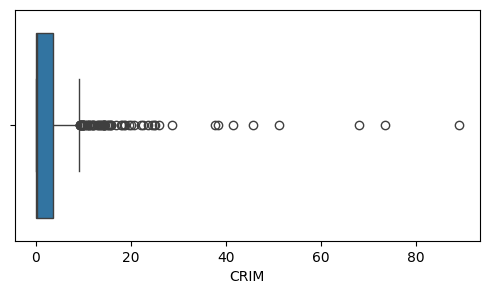

In [16]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=df.CRIM, orient='h')
plt.show()

CRIM 데이터는 한쪽으로 치우쳐져 있는 것을 알 수 있다.

따라서, 원래 이상치 대체할 경우, 평균을 많이 사용하지만, 평균은 이상치에 민감하기 때문에 중앙값을 사용할 것이다. (원래의 데이터 분포를 망치지 않기 위해서)

In [19]:
# CRIM 데이터의 중앙값
CRIM_median = df.CRIM.median()

# 원본 데이터를 망치지 않기 위해 다른 컬럼을 만들어서 결측치 채운 것을 생성
df['CRIM_fill'] = df['CRIM'].fillna(CRIM_median)

df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue,CRIM_fill
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0,0,0.00632
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6,0,0.02731


In [20]:
# 다시 요약 통계량 확인
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue,CRIM_fill
count,506.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,3.613524,10.931559,11.306616,0.066540,0.555954,6.271076,68.816540,3.742880,9.416350,410.547529,18.513308,357.888099,12.721578,22.374525,0.250951,3.485880
std,8.601545,22.977112,6.934739,0.249461,0.113854,0.698140,27.868375,2.083661,8.653743,169.180818,2.147684,89.829808,7.101213,9.104400,0.433973,8.460558
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000,0.006320
25%,0.082045,0.000000,5.190000,0.000000,0.453000,5.879250,45.625000,2.101425,4.000000,279.000000,17.400000,376.057500,7.150000,16.850000,0.000000,0.083742
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.183500,77.500000,3.095750,5.000000,334.500000,19.100000,391.955000,11.490000,21.100000,0.000000,0.256510
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.613500,93.900000,5.112625,24.000000,666.000000,20.200000,396.397500,17.057500,24.950000,0.750000,3.281688
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000,88.976200


거의 모든 데이터가 한쪽으로 치우쳐져 있다는 것을 알 수 있다.

In [21]:
# MEDV 확인
df.MEDV.describe()

count    526.000000
mean      22.374525
std        9.104400
min        5.000000
25%       16.850000
50%       21.100000
75%       24.950000
max       50.000000
Name: MEDV, dtype: float64

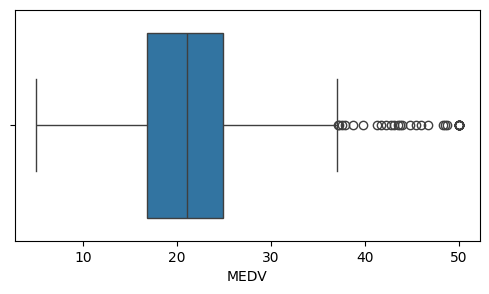

In [23]:
# boxplot 확인
plt.figure(figsize=(6, 3))
sns.boxplot(data=df.MEDV, orient='h')
plt.show()

In [28]:
# IQR 기준 이상치
Q1, Q3 = df.MEDV.quantile([0.25, 0.75])
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

out_num = len(df[(df.MEDV > upper_bound) | (df.MEDV < lower_bound)])

print('outlier 범위\n>> {:.2f} 초과, {:.2f} 미만'.format(upper_bound, lower_bound))
print('outlier 개수\n>> {:d}개 (전체의 {:.2f}%)'.format(out_num, out_num / df.shape[0] * 100))

outlier 범위
>> 37.10 초과, 4.70 미만
outlier 개수
>> 37개 (전체의 7.03%)


In [45]:
# 특정 컬럼의 이상치 범위와 개수를 보여주고 이상치만 존재하는 DF 반환하는 함수 만들기
def outlier(df, col):
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # 이상치 조건
    condition = (df[col] > upper_bound) | (df[col] < lower_bound)
    # 이상치만 존재하는 DF 만들기
    outlier_df = df[condition]
    
    print('{:s}의 outlier 범위\n>> {:.2f} 초과, {:.2f} 미만'.format(col, upper_bound, lower_bound))
    print('{:s}의 outlier 개수\n>> {:d}개 (전체의 {:.2f}%)'.format(col, outlier_df.shape[0], outlier_df.shape[0] / df.shape[0] * 100))
    
    return outlier_df

In [46]:
outlier(df, 'CRIM')

CRIM의 outlier 범위
>> 9.07 초과, -5.31 미만
CRIM의 outlier 개수
>> 66개 (전체의 12.55%)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue,CRIM_fill
367,13.5222,0.0,18.1,0,0.631,3.863,100.0,1.5106,24,666.0,20.2,131.42,13.33,23.1,0,13.5222
371,9.2323,0.0,18.1,0,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53,50.0,1,9.2323
373,11.1081,0.0,18.1,0,0.668,4.906,100.0,1.1742,24,666.0,20.2,396.90,34.77,13.8,0,11.1081
374,18.4982,0.0,18.1,0,0.668,4.138,100.0,1.1370,24,666.0,20.2,396.90,37.97,13.8,0,18.4982
375,19.6091,0.0,18.1,0,0.671,7.313,97.9,1.3163,24,666.0,20.2,396.90,13.44,15.0,0,19.6091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,15.5757,0.0,18.1,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74,18.13,19.1,0,15.5757
469,13.0751,0.0,18.1,0,0.580,5.713,56.7,2.8237,24,666.0,20.2,396.90,14.76,20.1,0,13.0751
477,15.0234,0.0,18.1,0,0.614,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91,12.0,0,15.0234
478,10.2330,0.0,18.1,0,0.614,6.185,96.7,2.1705,24,666.0,20.2,379.70,18.03,14.6,0,10.2330


In [49]:
# DF의 전체 컬럼의 이상치의 비율 보여주는 함수
def get_outlier_prop(df):
    Q1, Q3 = df.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    # 이상치 조건
    condition = (df > upper_bound) | (df < lower_bound)
    # 이상치만 존재하는 DF 만들기
    outlier_df = df[condition]
    # 이상치 비율 확인
    outlier_ratio = outlier_df.shape[0] / df.shape[0] * 100

    return '{:.2f}%'.format(outlier_ratio)

In [52]:
df.apply(get_outlier_prop)

CRIM           12.55%
ZN             12.93%
INDUS           0.00%
CHAS            6.65%
NOX             0.00%
RM              5.70%
AGE             0.00%
DIS             0.95%
RAD             0.00%
TAX             0.00%
PTRATIO         2.85%
B              15.21%
LSTAT           1.33%
MEDV            7.03%
isHighValue     0.00%
CRIM_fill      14.26%
dtype: object

In [55]:
# 특정 컬럼의 이상치 제거하는 함수
def remove_outliers(df, col):
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    # 이상치 조건
    condition = (df[col] > upper_bound) | (df[col] < lower_bound)
    # 이상치 제거한 DF 만들기
    no_outlier_df = df[~condition]

    return no_outlier_df

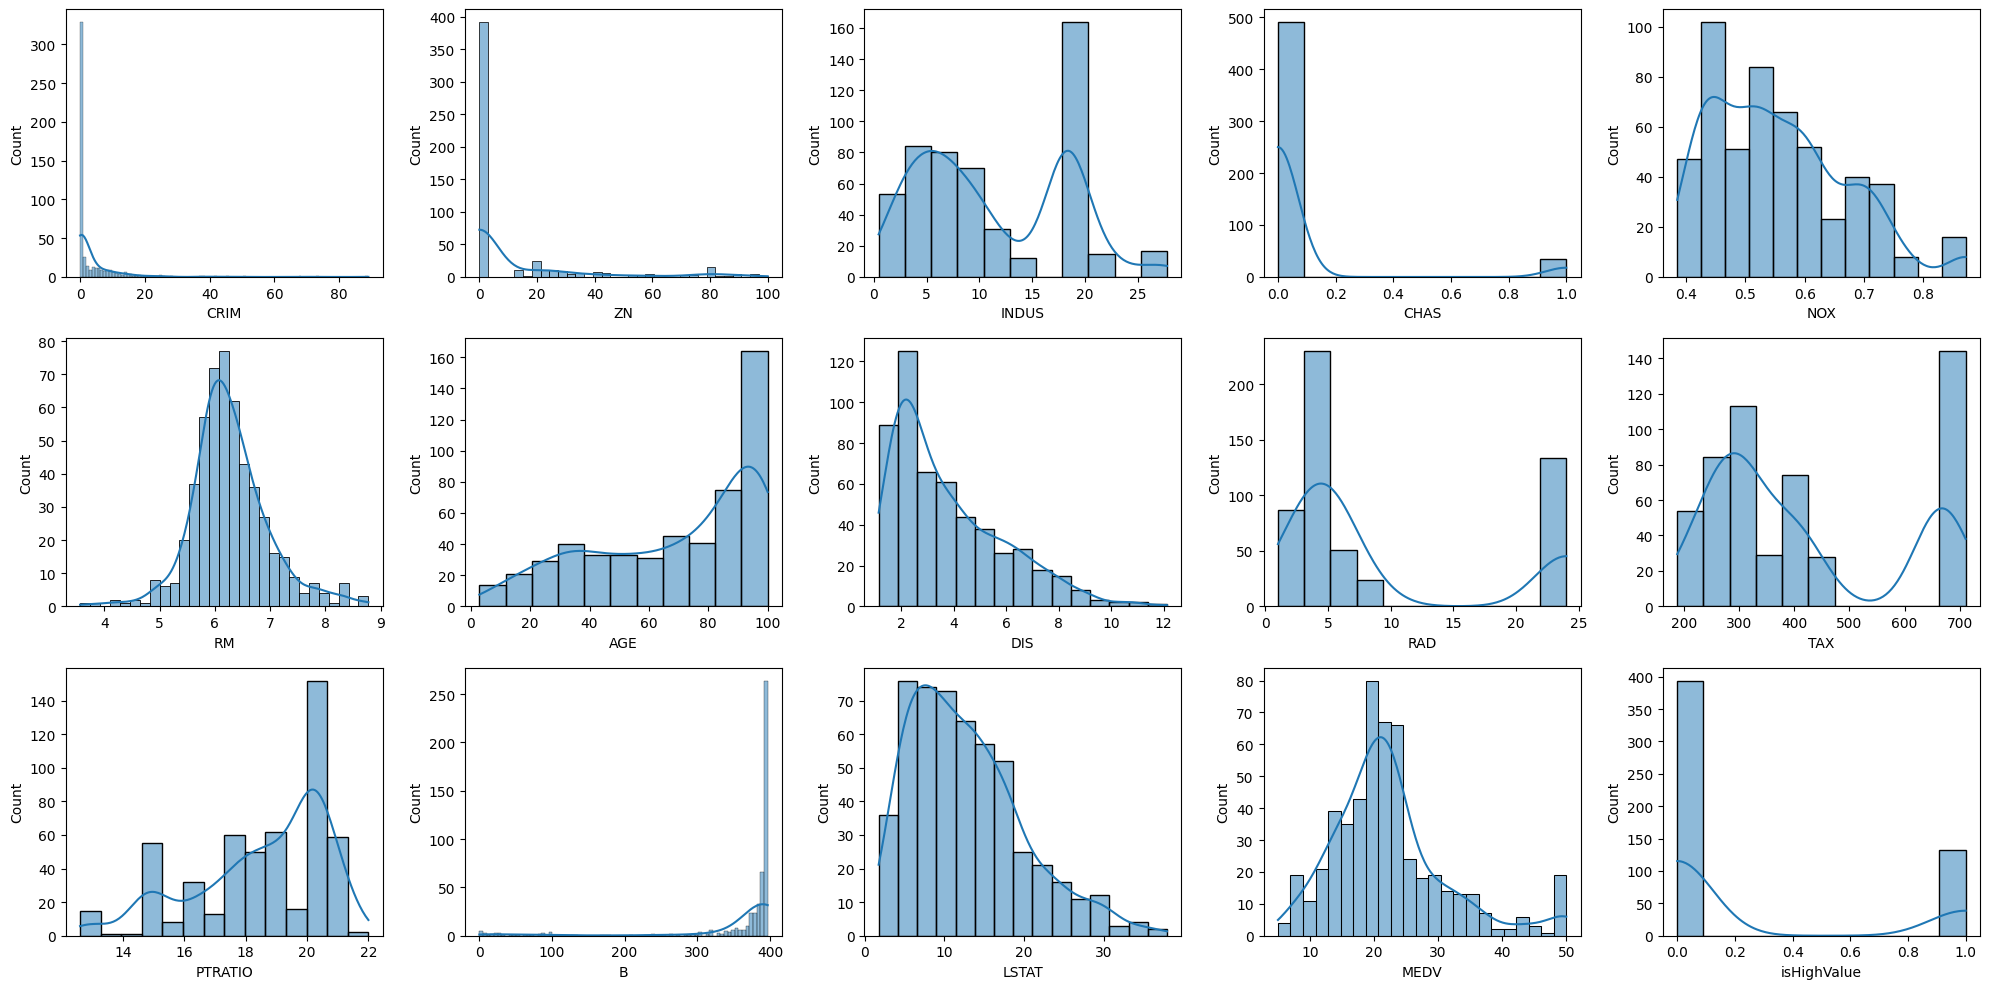

In [59]:
# 지우기 전 DF 확인하기
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))

idx = 0

for row in range(3):
    for col in range(5):
        if idx < len(df.columns):
            sns.histplot(df[df.columns[idx]], kde=True, ax=ax[row][col])
            idx += 1

plt.tight_layout()
plt.show()

**왜도**
* 기준 : 절댓값 3
    * 왜도의 절댓값이 3 이상이면, 통계적으로 크게 치우쳤다고 말한다.

In [62]:
# 왜도 확인하기
# skew() : 도도
df.apply(lambda x : x.skew(), axis=0)

CRIM           5.223149
ZN             2.290540
INDUS          0.335891
CHAS           3.488440
NOX            0.707609
RM             0.430156
AGE           -0.616643
DIS            1.065567
RAD            1.035748
TAX            0.659300
PTRATIO       -0.848553
B             -2.956237
LSTAT          0.893318
MEDV           1.126802
isHighValue    1.152146
CRIM_fill      5.321802
dtype: float64

현재의 DF에서 왜도의 기준에 크게 벗어난 것은 **CRIM**과 **CHAS**이다.

따라서, 로그 변환을 해준다.

In [65]:
df['CRIM_fill_log'] = np.log1p(df.CRIM_fill)

df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue,CRIM_fill,CRIM_fill_log
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0,0,0.00632,0.006300
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6,0,0.02731,0.026944


In [66]:
# 다시 왜도 확인하기
df.apply(lambda x : x.skew(), axis=0)

CRIM             5.223149
ZN               2.290540
INDUS            0.335891
CHAS             3.488440
NOX              0.707609
RM               0.430156
AGE             -0.616643
DIS              1.065567
RAD              1.035748
TAX              0.659300
PTRATIO         -0.848553
B               -2.956237
LSTAT            0.893318
MEDV             1.126802
isHighValue      1.152146
CRIM_fill        5.321802
CRIM_fill_log    1.329005
dtype: float64

In [68]:
# MEDV 이상치 제거한 DF 만들기
df_MEDV_no_out = remove_outliers(df, 'MEDV')

print(df_MEDV_no_out.shape)
df_MEDV_no_out.head(2)

(489, 17)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue,CRIM_fill,CRIM_fill_log
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0,0,0.00632,0.006300
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6,0,0.02731,0.026944


In [69]:
# 왜도 확인
df_MEDV_no_out.apply(lambda x : x.skew(), axis=0)

CRIM             5.055430
ZN               2.354004
INDUS            0.311843
CHAS             3.822908
NOX              0.704176
RM              -0.318433
AGE             -0.621499
DIS              1.056890
RAD              0.989592
TAX              0.617855
PTRATIO         -0.914858
B               -2.821286
LSTAT            0.905856
MEDV             0.177514
isHighValue      1.550232
CRIM_fill        5.158718
CRIM_fill_log    1.291782
dtype: float64

# 모델링
* 회귀 분석 - 가격예측
    * 연속형 변수를 사용할 것!

In [70]:
df_MEDV_no_out.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'isHighValue', 'CRIM_fill',
       'CRIM_fill_log'],
      dtype='object')

In [105]:
df_MEDV_no_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 489 entries, 0 to 525
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRIM           469 non-null    float64
 1   ZN             489 non-null    float64
 2   INDUS          489 non-null    float64
 3   CHAS           489 non-null    int64  
 4   NOX            489 non-null    float64
 5   RM             489 non-null    float64
 6   AGE            489 non-null    float64
 7   DIS            489 non-null    float64
 8   RAD            489 non-null    int64  
 9   TAX            489 non-null    float64
 10  PTRATIO        489 non-null    float64
 11  B              489 non-null    float64
 12  LSTAT          489 non-null    float64
 13  MEDV           489 non-null    float64
 14  isHighValue    489 non-null    int64  
 15  CRIM_fill      489 non-null    float64
 16  CRIM_fill_log  489 non-null    float64
dtypes: float64(14), int64(3)
memory usage: 68.8 KB


In [106]:
# 필요한 컬럼만 가져오기
features = ['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CRIM_fill_log']

abs(df_MEDV_no_out[features].corr().MEDV).sort_values(ascending=False)

MEDV             1.000000
LSTAT            0.772650
INDUS            0.616556
CRIM_fill_log    0.606428
TAX              0.591217
RM               0.575942
NOX              0.570185
AGE              0.566349
PTRATIO          0.491928
RAD              0.488826
DIS              0.449426
ZN               0.438367
B                0.390294
Name: MEDV, dtype: float64

In [79]:
# 상관관계
# 0.4 - 약한 상관관계
# 0.6 - 강한 상관관계
# 분석을 할 때는 강한 상관관계의 변수만 추출해서 확인하는 것이 일반적이다.

# 0.6 이상인 경우
X_col_v1 = ['LSTAT', 'INDUS', 'CRIM_fill_log']
# 0.4 이상의 변수 추출할 경우
X_col_v2 = ['LSTAT', 'INDUS', 'CRIM_fill_log', 'TAX', 'RM', 'NOX', 'AGE', 'PTRATIO', 'RAD', 'DIS', 'ZN']

In [81]:
X.head(2)

,LSTAT,INDUS,CRIM_fill_log
0,4.98,2.31,0.006300
1,9.14,7.07,0.026944


# 데이터 스케일링

In [107]:
# 분석 데이터셋 - v1 / v2 넣어서 각각 확인해기기
X = df_MEDV_no_out[X_col_v2]
y = df_MEDV_no_out.MEDV

from sklearn.model_selection import train_test_split

# training / test data
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(342, 11) (342,) (147, 11) (147,)


In [108]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## 선형회귀

In [109]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()

model_1.fit(X_train, y_train)

print('회귀 계수 (가중치) :', model_1.coef_)
print('편향 : {:.2f}'.format(model_1.intercept_))

회귀 계수 (가중치) : [-11.94101899  -1.0294748  -10.303597    -4.12232345   9.71884267
  -4.7775227   -2.08069439  -7.77212822   5.93302954  -9.53007855
   2.30111314]
편향 : 31.86


## SVM - SVR

In [110]:
from sklearn.svm import SVR

model_2 = SVR()

model_2.fit(X_train, y_train)

SVR()

## Randomforest

In [112]:
from sklearn.ensemble import RandomForestRegressor

model_3 = RandomForestRegressor(random_state=42)

model_3.fit(X_train, y_train)

# feature importance 확인
for i, value in zip(X_col_v2, model_3.feature_importances_):
    print('{:s} : {:.2f}'.format(i, value))

LSTAT : 0.53
INDUS : 0.02
CRIM_fill_log : 0.07
TAX : 0.02
RM : 0.23
NOX : 0.04
AGE : 0.02
PTRATIO : 0.02
RAD : 0.01
DIS : 0.04
ZN : 0.00


# 분석 모델 평가 - 모델 간 성능 비교
* 회귀모델 평가할 때는 MAE, MSE, MAPE, r2_score 사용!
* 분류모델 평가할 때는 accuracy_score 사용!

In [113]:
# 모델 활용 예측값
lr_predict = model_1.predict(X_test)
svr_predict = model_2.predict(X_test)
rf_predict = model_3.predict(X_test)

In [114]:
# 평가 지표 계산
from sklearn.metrics import * # 전체 다 가져오기

for i, model in enumerate([model_1, model_2, model_3]):
    print(f'===== {i+1}번 모델 평가 =====')
    print('MAE : {:.4f}\nMSE : {:.4f}\nMAPE : {:.4f}'.format(mean_absolute_error(y_test, model.predict(X_test)), mean_squared_error(y_test, model.predict(X_test)), mean_absolute_percentage_error(y_test, model.predict(X_test))))
    print('R2 SCORE : {:.4f}'.format(r2_score(y_test, model.predict(X_test))))

===== 1번 모델 평가 =====
MAE : 2.6315
MSE : 11.0660
MAPE : 0.1485
R2 SCORE : 0.7407
===== 2번 모델 평가 =====
MAE : 2.8901
MSE : 13.5195
MAPE : 0.1579
R2 SCORE : 0.6832
===== 3번 모델 평가 =====
MAE : 2.9334
MSE : 14.5560
MAPE : 0.1603
R2 SCORE : 0.6589


In [115]:
# 다른 반복문
model_predict = \
{'LinearRegression' : lr_predict,
 'SVR' : svr_predict,
 'RandomForest' : rf_predict}

for name, pred in model_predict.items():
    print('='*5, name, '='*5)
    print('MAE : {:.4f}'.format(mean_absolute_error(y_test, pred)))
    print('MSE : {:.4f}'.format(mean_squared_error(y_test, pred)))
    print('MAPE : {:.4f}'.format(mean_absolute_percentage_error(y_test, pred)))
    print('R2 SCORE : {:.4f}'.format(r2_score(y_test, pred)))

===== LinearRegression =====
MAE : 2.6315
MSE : 11.0660
MAPE : 0.1485
R2 SCORE : 0.7407
===== SVR =====
MAE : 2.8901
MSE : 13.5195
MAPE : 0.1579
R2 SCORE : 0.6832
===== RandomForest =====
MAE : 2.9334
MSE : 14.5560
MAPE : 0.1603
R2 SCORE : 0.6589


# 분류 모델
* isHighValue : 종속변수

In [137]:
# MEDV : 없애고 시작하기
df_no_MEDV = df.drop(columns='MEDV')

In [138]:
print(df_no_MEDV.shape)
df_no_MEDV.head(2)

(526, 16)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,isHighValue,CRIM_fill,CRIM_fill_log
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,0,0.00632,0.006300
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,0,0.02731,0.026944


In [139]:
df_no_MEDV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRIM           506 non-null    float64
 1   ZN             526 non-null    float64
 2   INDUS          526 non-null    float64
 3   CHAS           526 non-null    int64  
 4   NOX            526 non-null    float64
 5   RM             526 non-null    float64
 6   AGE            526 non-null    float64
 7   DIS            526 non-null    float64
 8   RAD            526 non-null    int64  
 9   TAX            526 non-null    float64
 10  PTRATIO        526 non-null    float64
 11  B              526 non-null    float64
 12  LSTAT          526 non-null    float64
 13  isHighValue    526 non-null    int64  
 14  CRIM_fill      526 non-null    float64
 15  CRIM_fill_log  526 non-null    float64
dtypes: float64(13), int64(3)
memory usage: 65.9 KB


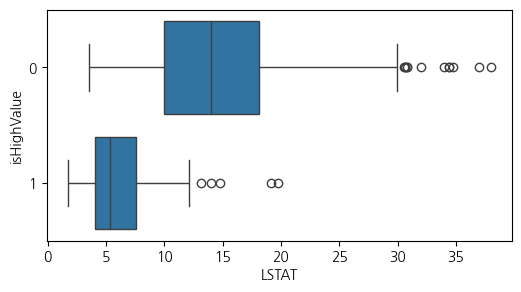

In [140]:
# LSTAT 변수 boxplot 확인
plt.figure(figsize=(6, 3))
sns.boxplot(data=df_no_MEDV, y='isHighValue', x='LSTAT', orient='h')
plt.show()

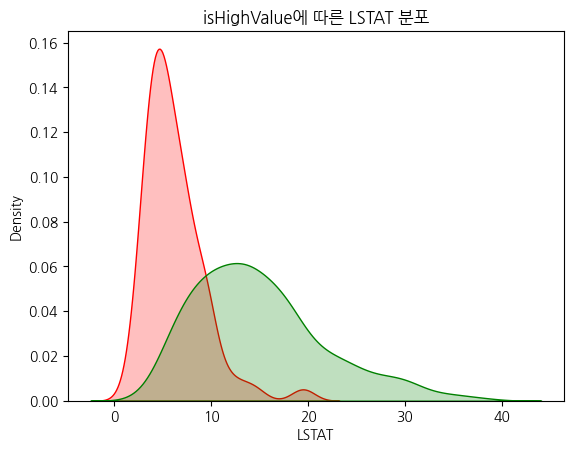

In [141]:
# LSTAT kdeplot 확인
sns.kdeplot(df_no_MEDV.loc[df_no_MEDV['isHighValue']==1, 'LSTAT'], color='red', fill=True)
sns.kdeplot(df_no_MEDV.loc[df_no_MEDV['isHighValue']==0, 'LSTAT'], color='green', fill=True)
plt.title('isHighValue에 따른 LSTAT 분포')
plt.show()

In [142]:
# isHighValue 값 별 변수의 평균
condition = df_no_MEDV['isHighValue'] == 1

df_no_MEDV[condition].apply(lambda x : x.mean(), axis=0)

CRIM               0.856514
ZN                24.602273
INDUS              6.488485
CHAS               0.121212
NOX                0.494454
RM                 7.009394
AGE               55.257576
DIS                4.365642
RAD                6.204545
TAX              316.007576
PTRATIO           16.927273
B                384.914697
LSTAT              6.146061
isHighValue        1.000000
CRIM_fill          0.856514
CRIM_fill_log      0.354194
dtype: float64

In [143]:
df_no_MEDV.groupby('isHighValue').mean().T

isHighValue,0,1
CRIM,4.586586,0.856514
ZN,6.351523,24.602273
INDUS,12.920812,6.488485
CHAS,0.048223,0.121212
NOX,0.576558,0.494454
RM,6.023721,7.009394
AGE,73.359137,55.257576
DIS,3.534238,4.365642
RAD,10.492386,6.204545
TAX,442.220812,316.007576


## 분석 모형 구축하기
* 분류 모델에서는 상관관계가 꼭 필요하지는 않음.
* 회귀는 상관관계가 중요함.

In [145]:
df_no_MEDV.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'isHighValue', 'CRIM_fill', 'CRIM_fill_log'],
      dtype='object')

In [146]:
abs(df_no_MEDV.corr().isHighValue).sort_values(ascending=False)

isHighValue      1.000000
RM               0.612707
LSTAT            0.536475
PTRATIO          0.427853
INDUS            0.402532
ZN               0.344705
TAX              0.323755
NOX              0.312952
AGE              0.281882
CRIM_fill_log    0.250838
RAD              0.215029
CRIM             0.190609
CRIM_fill        0.180055
B                0.174310
DIS              0.173160
CHAS             0.126974
Name: isHighValue, dtype: float64

로지스틱 회귀를 쓸 경우, 상관관계를 파악 후 변수를 뽑아서 모델링을 하는 것이 좋음.

하지만, 분류 모델에서는 굳이 상관관계를 파악할 필요가 있을까 싶음.
* 일단 돌려서 변수 중요도를 파악한 후 다시 필요한 변수를 수정해도 좋을 것 같다.

### 일단 다 돌려서 변수 중요도 파악하기

In [147]:
# 독립변수
X = df[['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CRIM_fill_log']]
# 종속변수
y = df.isHighValue

# training / test data 확인
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=42)

In [148]:
# 데이터 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.fit_transform(X_test)

### feature Selection
1. 모델에 의한 변수 선택(모델 기반 변수 선택법)
- 트리기반, 회귀기반 모델에서의 변수 중요도를 참고
- 트리기반에서는 변수 중요도(feature importance)를, 회귀에서는 각 변수의 계수를 참고하여 사용
- 모델에 학습된 변수의 상관관계도 함께 고려

2. 일변량 통계 기법
- 각 변수 하나하나를 독립적으로 각 변수 중요도를 계산
- 학습 시킬 모델이 필요 없어 연산 속도가 매우 빠름
- 각 변수 마다의 종속변수와의 상관 관계 파악 
- scikit-learn : 분류에서 f_classit(기본값) 사용, 회귀에서는 f_regression 사용하여 test
    - 계산한 p-value에 기초하여 특성을 제외하는 방식 선택 , 제외 시 임계값 조정하는 매개변수 이용
    - 임계값 계산 - selectKBest : 고정된 k개의 특성 선택,  SelectPercentitle : 지정 비율만큼 특성 선택 

3. 반복적 선택
- 변수의 선택과 제거를 반복(통계 패키지의 setp-wise기법과 유사)
- 모든 변수를 학습시킨 후 불필요한 변수를 제거, 다시 필요한 변수를 추가하는 방식 

In [175]:
# 먼저 변수 중요도 확인을 위해 model이라는 임시 모델링 하기
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train_minmax, y_train)

# 변수 중요도 확인 - 중요도 확인할 수 있는 모델이 따로 있음. (트리, 회귀 기반은 feature_importances 확인 가능)
# 회귀계수 (가중치)로도 
feature_importance_df = \
pd.DataFrame({'feature' : X.columns.tolist(),
              'importance' : model.feature_importances_}).sort_values(by='importance', ascending=False).reset_index(drop=True)

In [171]:
sorted(model.feature_importances_, reverse=True)

[0.33305537999118445,
 0.1915081616833563,
 0.08091946753048143,
 0.06929232298311597,
 0.050334485346001025,
 0.04708344190897445,
 0.046466660675006134,
 0.044625473624446535,
 0.044125640949015485,
 0.03342891073060448,
 0.027815299917397094,
 0.02305151656122279,
 0.00829323809919392]

In [172]:
# 변수 중요도 확인하는 다른 방법
pd.DataFrame({'feature_num' : model.feature_importances_.argsort()[::-1], # 원래 중요도 인덱스
              'feature' : X.columns[model.feature_importances_.argsort()[::-1]],
              'importance' : sorted(model.feature_importances_, reverse=True)})

,feature_num,feature,importance
0,4,RM,0.333055
1,11,LSTAT,0.191508
2,9,PTRATIO,0.080919
3,1,INDUS,0.069292
4,3,NOX,0.050334
5,6,DIS,0.047083
6,8,TAX,0.046467
7,5,AGE,0.044625
8,12,CRIM_fill_log,0.044126
9,0,ZN,0.033429


In [160]:
# argsort()
# 배열을 정렬하기 전, 요소의 위치 반환
arr = np.array([3, 1, 4, 5, 9, 2])
print(arr)

print(arr.argsort())
print(arr[np.argsort(arr)])

# 내림차순 정렬
print(np.argsort(arr)[::-1])
arr[np.argsort(arr)[::-1]]

[3 1 4 5 9 2]
[1 5 0 2 3 4]
[1 2 3 4 5 9]
[4 3 2 0 5 1]


array([9, 5, 4, 3, 2, 1])

### 중요한 변수만 먼저 추출해서 분류 모델링 변수 설정하기
* 로지스틱 회귀 같은 경우, feature_importances_가 없음.
    * 선형모델이기 때문에
    * 선형모델은 각 특성에 대한 가중치 (weight)가 포함되어 있다.
    * 가중치 자체가 특성의 중요도를 설명한다.
* 변수 중요도 : 회귀계수의 크기(>> 표준화된 계수), p-value(통계적으로 **유의미**한가?)

In [173]:
# 상관관계 확인 ! - 로지스틱 회귀는 상관관계가 중요함.
abs(df_no_MEDV.corr().isHighValue).sort_values(ascending=False)

isHighValue      1.000000
RM               0.612707
LSTAT            0.536475
PTRATIO          0.427853
INDUS            0.402532
ZN               0.344705
TAX              0.323755
NOX              0.312952
AGE              0.281882
CRIM_fill_log    0.250838
RAD              0.215029
CRIM             0.190609
CRIM_fill        0.180055
B                0.174310
DIS              0.173160
CHAS             0.126974
Name: isHighValue, dtype: float64

In [176]:
# 위에서 한 feature_importances_와 비교하기
feature_importance_df

,feature,importance
0,RM,0.282853
1,LSTAT,0.257223
2,INDUS,0.067244
3,PTRATIO,0.064626
4,TAX,0.059972
5,DIS,0.051957
6,NOX,0.048595
7,AGE,0.042764
8,CRIM_fill_log,0.038720
9,ZN,0.030508


In [179]:
# 분석 모형 구축하기
# 독립변수
X_cols = feature_importance_df.feature.values[:-4]
X = df_no_MEDV[X_cols]
# 종속변수
y = df_no_MEDV.isHighValue

# training / test data
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(368, 9) (368,) (158, 9) (158,)


In [181]:
# 데이터 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.fit_transform(X_test)

In [182]:
# 모델 생성
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression()

# fitting
model_1.fit(X_train_minmax, y_train)

print(model_1.coef_)
print(model_1.intercept_)

# 예측
y_pred_lr = model_1.predict(X_test_minmax)

[[ 4.09455307 -3.5982337  -1.13355143 -2.23670143 -0.59133309 -1.38748032
  -0.85067999 -0.35539512  0.56071801]]
[0.28414509]


In [183]:
# 모델 생성
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier()

# fitting
model_2.fit(X_train_minmax, y_train)

for i, value in zip(X_cols, model_2.feature_importances_):
    print('{:s} : {:.4f}'.format(i, value))

# 예측
y_pred_rf = model_2.predict(X_test_minmax)

RM : 0.3190
LSTAT : 0.2627
INDUS : 0.1025
PTRATIO : 0.0752
TAX : 0.0621
DIS : 0.0515
NOX : 0.0472
AGE : 0.0389
CRIM_fill_log : 0.0409


In [192]:
# 모델 생성
from sklearn.svm import SVC

model_3 = SVC(probability=True)

# fitting
model_3.fit(X_train_minmax, y_train)

# 예측
y_pred_svc = model_3.predict(X_test_minmax)

In [193]:
# 모델 평가
from sklearn.metrics import classification_report

model_name = ['LogisticRegression', 'SVC', 'RandomForestClassifier']
model_pred = [y_pred_lr, y_pred_svc, y_pred_rf]

for name, pred in zip(model_name, model_pred):
    print('='*10, name, '='*10)
    print(classification_report(y_test, pred, labels=[0, 1]))

========== LogisticRegression ==========
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       119
           1       0.93      0.64      0.76        39

    accuracy                           0.90       158
   macro avg       0.91      0.81      0.85       158
weighted avg       0.90      0.90      0.89       158

========== SVC ==========
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       119
           1       0.87      0.67      0.75        39

    accuracy                           0.89       158
   macro avg       0.88      0.82      0.84       158
weighted avg       0.89      0.89      0.89       158

========== RandomForestClassifier ==========
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       119
           1       0.83      0.90      0.86        39

    accuracy                           0.93       158
   macro avg    

In [194]:
# 함수 만들기
def cls_report(model_name, modeL_pred):
    for name, pred in zip(model_name, model_pred):
        print('='*10, name, '='*10)
        print(classification_report(y_test, pred, labels=[0, 1]))

cls_report(model_name, model_pred)

========== LogisticRegression ==========
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       119
           1       0.93      0.64      0.76        39

    accuracy                           0.90       158
   macro avg       0.91      0.81      0.85       158
weighted avg       0.90      0.90      0.89       158

========== SVC ==========
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       119
           1       0.87      0.67      0.75        39

    accuracy                           0.89       158
   macro avg       0.88      0.82      0.84       158
weighted avg       0.89      0.89      0.89       158

========== RandomForestClassifier ==========
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       119
           1       0.83      0.90      0.86        39

    accuracy                           0.93       158
   macro avg    

predict_proba 결과
* [0일 때 확률, 1일 때 확률]

In [196]:
# ROC_AUC curve
from sklearn.metrics import roc_auc_score

# 1번 클래스에 속할 확률 구기기
pred_proba_lr = model_1.predict_proba(X_test_minmax)[:, 1]
pred_proba_rf = model_2.predict_proba(X_test_minmax)[:, 1]
pred_proba_svc = model_3.predict_proba(X_test_minmax)[:, 1]

pred_proba = [pred_proba_lr, pred_proba_svc, pred_proba_rf]

for name, proba in zip(model_name, pred_proba):
    print('='*10, name, '='*10)
    print('ROC-AUC SCORE : {:.2f}'.format(roc_auc_score(y_test, proba)))

========== LogisticRegression ==========
ROC-AUC SCORE : 0.90
========== SVC ==========
ROC-AUC SCORE : 0.95
========== RandomForestClassifier ==========
ROC-AUC SCORE : 0.97


더 공부해야할 것들
* 특성 추출 방법들